In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn
import pandas as pd
import cv2
import sys
import re
from datetime import datetime as dt
import time
import scipy.ndimage as ndi 
sys.path.append('/Users/joshuakeeling/Dropbox/example_files')


ModuleNotFoundError: No module named 'cv2'

In [5]:
from mecll.rsync import Rsync_aligner


ModuleNotFoundError: No module named 'mecll'

In [7]:
root_path = '/Users/joshuakeeling/Dropbox/example_files/of_example2/'
all_fs = os.listdir(root_path)
position = np.load(os.path.join(root_path,[i for i in os.listdir(root_path) if '_positions.npy' in i][0]))


sync_path_spk = os.path.join(root_path,[i for i in all_fs if i=='timestamps.npy'][0])#'/Users/yves/Downloads/example_files/timestamps.npy'
sync_messages_spk = np.load(sync_path_spk)[::2][:-1].astype('float')


In [8]:
plt.plot(delta_p[:,0])
plt.plot(ndi.gaussian_filter1d(delta_p,8)[:,0])
plt.xlim(0,3000)

NameError: name 'delta_p' is not defined

In [1632]:
np.where(np.all(np.logical_not(np.isfinite(position)),axis=1))[0]

array([    68,    123,    124, ..., 109881, 109883, 109884])

([<matplotlib.axis.XTick at 0x7fcfccacbcd0>,
 <a list of 10 Text xticklabel objects>)

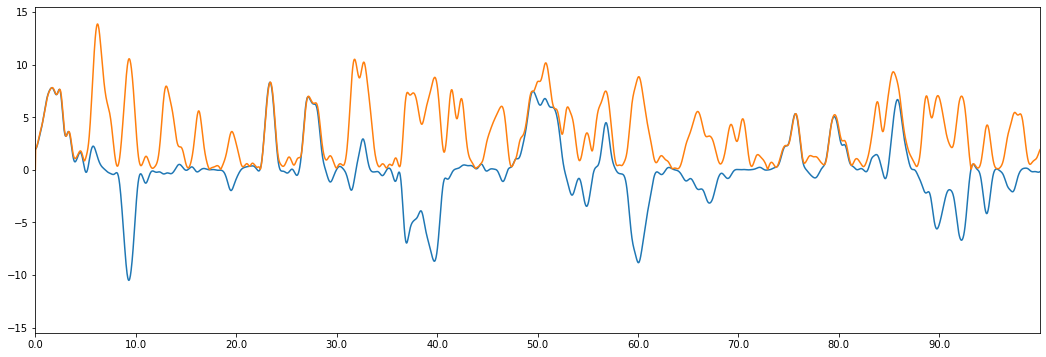

In [1633]:
plt.figure(figsize=(18,6))
#position[np.logical_not(np.isfinite(position[:,0])),:] = 0
delta_p = (position[1:] - position[:-1])
delta_p[np.logical_not(np.isfinite(delta_p[:,0])),:] = 0
delta_p[np.sum(np.abs(delta_p),axis=1)>20,:] = 0
#delta_p[np.sum(np.abs(delta_p),axis=1)<2,:] = 0

delta_p = ndi.gaussian_filter1d(delta_p,8,axis=0)
#delta_p[]
speed = np.concatenate([[0],np.sqrt(np.sum(delta_p**2,axis=1))])
plt.plot(delta_p[:,0])
plt.plot(speed)

#plt.plot(ndi.gaussian_filter1d(delta_p[:,0],7))

plt.xlim(0,3000)
plt.xticks(np.arange(0,3000,300),np.arange(0,3000,300)/30.)
#plt.ylim(-10,10)

In [1634]:
speed

array([0.        , 2.03084112, 2.05668194, ..., 6.76560485, 6.79253641,
       6.80612001])

In [1635]:
delta_p

array([[ 1.93946561, -0.60231953],
       [ 1.95975879, -0.62392793],
       [ 1.99983057, -0.66574449],
       ...,
       [-6.71017865, -0.86424042],
       [-6.73819044, -0.85752001],
       [-6.7523254 , -0.85403236]])

In [1636]:
np.unique(speed)

array([0.00000000e+00, 8.36479065e-06, 1.18296004e-05, ...,
       1.40611028e+01, 1.40743729e+01, 1.40935396e+01])

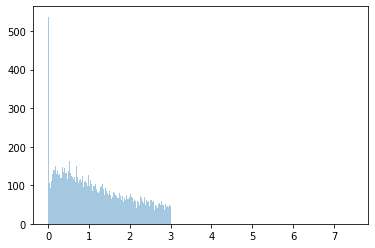

In [1637]:
seaborn.distplot(speed[np.isfinite(speed)]*30/10,kde=0,bins=np.linspace(0,3,num=500))


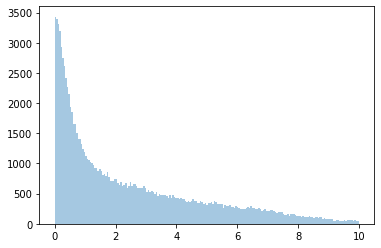

In [1638]:
#speed = ndi.gaussian_filter1d(np.concatenate([[0],np.sqrt(np.sum((position[1:] - position[:-1])**2,axis=1))]),5)
seaborn.distplot(speed[np.isfinite(speed)],kde=0,bins=np.linspace(0,10,num=200))
#plt.xlim(0,100)

In [1639]:
clr_ = seaborn.color_palette('RdBu_r',n_colors=len(position[:,0]))

In [1640]:
for i in range(1,position.shape[0]):
    if np.abs(position[i-1,:]-position[i]).sum()>100:
        position[i] = position[i-1]

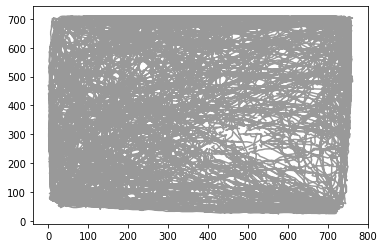

In [1641]:
n_ = 1
#plt.scatter(position[::n_,0],position[::n_,1],c=clr_,s=8,alpha=1)
plt.plot(position[speed>2,0],position[speed>2,1],color='k',alpha=.4)


In [1642]:
position

array([[ 25. ,  83. ],
       [ 27. ,  87. ],
       [ 33. ,  92. ],
       ...,
       [ 71.5, 572. ],
       [ 65. , 572. ],
       [ 59. , 572. ]])

In [1643]:
ixs = np.where(np.all(np.isfinite(position),axis=1))[0]
out = np.histogram2d(position[ixs,0],position[ixs,1],bins=90)

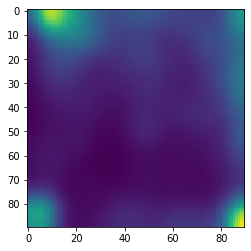

In [1644]:
plt.imshow(ndi.gaussian_filter(out[0],5))

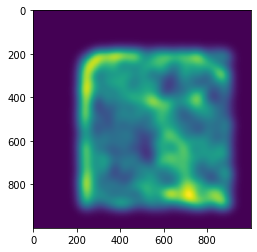

In [1645]:
plt.imshow(occupancy_arr)

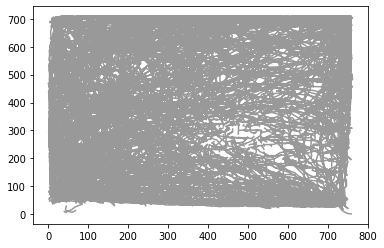

In [1646]:
n_ = 5
#plt.scatter(position[::n_,0],position[::n_,1],c=clr_,s=8,alpha=1)
plt.plot(position[:,0],position[:,1],color='k',alpha=.4)


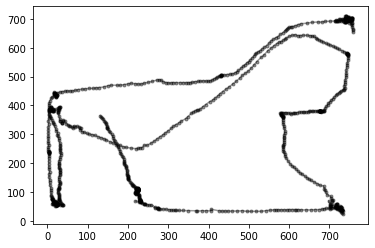

In [1647]:
slc =  slice(1000,2000)
plt.plot(position[slc,0],position[slc,1],color='k',alpha=.4,marker='.')


In [1648]:

#load spiking data
#ROOT = '/Users/yves/Downloads/example_files/'
spkT = np.load(os.path.join(root_path,[i for i in all_fs if i=='spike_times.npy'][0])).flatten()
spkC = np.load(os.path.join(root_path,[i for i in all_fs if i=='spike_clusters.npy'][0])).flatten()
cluster_labels = pd.read_table(os.path.join(root_path,[i for i in all_fs if '.tsv' in i][0]))


#select single units
single_units = np.where(cluster_labels.KSLabel=='good')[0]

In [1649]:
import scipy as sp
import scipy.signal

In [1650]:
np.mean(speed>5)

0.17192794396853225

In [1651]:
cam_sync_path = os.path.join(root_path,[i for i in all_fs if ('OFB' in i and 'pinstate' in i)][0])
sync_df = pd.read_csv(cam_sync_path,header=None)
sync_messages_cam = np.where((sync_df[0].values[1:] - sync_df[0].values[:-1])<0)[0].astype('float')

In [1652]:
len(sync_messages_cam)

708

In [1653]:
len(sync_messages_spk)

706

In [1654]:
aligner = Rsync_aligner(sync_messages_spk,sync_messages_cam,units_A=30/30000.,units_B=1)

In [1655]:
single_units = np.where(cluster_labels.KSLabel=='good')[0]

In [1656]:
from scipy.ndimage import gaussian_filter

In [1657]:
def gaussian_kernel(win_size, sigma):
    t = np.arange(win_size)
    x, y = np.meshgrid(t, t)
    o = (win_size - 1) / 2
    r = np.sqrt((x - o)**2 + (y - o)**2)
    scale = 1 / (sigma**2 * 2 * np.pi)
    return scale * np.exp(-0.5 * (r / sigma)**2)

In [1658]:
dd_ = 100
sigma= 25
g = gaussian_kernel(2*dd_,sigma)

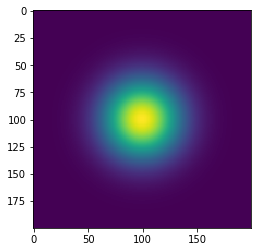

In [1659]:
plt.imshow(g)

In [1660]:
def get_half_split_maps(unit,spkT,spkC,aligner):
    """ divides the session into two halves and calculates 
    firing rate maps separately for each half. Also returns
    correlation between the two maps
    """

In [1661]:
def get_rate_map(aligned_spike_times,position,start=None,end=None):
    resp_arr = np.zeros([1000,1000])
    if start is not None:
        aligned_spike_times = aligned_spike_times[aligned_spike_times>start]
    if end is not None:
        aligned_spike_times = aligned_spike_times[aligned_spike_times<start]

    for spk in aligned_spike_times:
        tmp_ = np.zeros([1000,1000])
        at_pos = position[i]
        xp,yp = at_pos.astype(int)
        #tmp_ = np.zeros([1000,1000])
        resp_arr[2*dd_+xp-dd_:2*dd_+xp+dd_,2*dd_+yp-dd_:2*dd_+yp+dd_] += g
    return resp_arr

In [1662]:
def filter_nan_gaussian_david(arr, sigma):
    """Allows intensity to leak into the nan area.
    According to Davids answer:
        https://stackoverflow.com/a/36307291/7128154
    """
    gauss = arr.copy()
    gauss[np.isnan(gauss)] = 0
    gauss = ndi.gaussian_filter(
            gauss, sigma=sigma, mode='constant', cval=0)

    norm = np.ones(shape=arr.shape)
    norm[np.isnan(arr)] = 0
    norm = ndi.gaussian_filter(
            norm, sigma=sigma, mode='constant', cval=0)

    # avoid RuntimeWarning: invalid value encountered in true_divide
    norm = np.where(norm==0, 1, norm)
    gauss = gauss/norm
    gauss[np.isnan(arr)] = np.nan
    return gauss

In [1663]:
position.shape

(110081, 2)

In [1664]:
def get_split_half_correlations(aligner,spkC,spkT,position,speed,SPEED_THRESH=2):
    
    #speed = np.concatenate([[0]*2,speed])
    n_timepoints = position.shape[0]
    half = int(np.floor(n_timepoints/2.))
    position1 = position[:half]
    position2 = position[half:]
    print(len(speed[:half]),len(position[:half]))
    
    ixs = np.where(np.logical_and(np.all(np.isfinite(position1),axis=1),speed[:half]>SPEED_THRESH))[0]
    occupancy_map1,_,_ = np.histogram2d(position1[ixs,0],position1[ixs,1],bins=np.linspace(0,780,num=51))
    
    ixs = np.where(np.logical_and(np.all(np.isfinite(position2),axis=1),speed[half:]>SPEED_THRESH))[0]
    occupancy_map2,_,_ = np.histogram2d(position2[ixs,0],position2[ixs,1],bins=np.linspace(0,780,num=51))
    
    
    ccs = []
    for unit_nr in single_units:
        sys.stdout.write('\r{}/{}'.format(unit_nr,single_units[-1]))
        spk_unit = spkT[np.where(spkC==unit_nr)[0]]


        aligned_T = aligner.A_to_B(spk_unit)
        #get the spikes that are in bounds for position encoding
        spks_unit_in_bounds = np.where(np.logical_not(np.isnan(aligned_T)))[0]
        used_spikes = aligned_T[spks_unit_in_bounds].astype('int')
        used_spikes = np.array([i for i in used_spikes if speed[i]>SPEED_THRESH])

        used_spikes_half1 = used_spikes[used_spikes<half]
        #print(used_spikes_half1)
        #break
        used_spikes_half2 = used_spikes[used_spikes>=half]

        if len(used_spikes_half1)>0 and len(used_spikes_half2)>0:
            posS = position[used_spikes_half1] 
            spike_poss,_,_ = np.histogram2d(posS[:,0],posS[:,1],bins=np.linspace(0,780,num=51))

            norm_firing = spike_poss/occupancy_map1
            norm_smth_half1 = filter_nan_gaussian_david(norm_firing,2)
            norm_smth[np.logical_not(np.isfinite(norm_smth))] = 0
            #print(len(used_spikes_half2))
            #print(norm_smth.sum(),occupancy_map2.sum())
            #break

            posS = position[used_spikes_half2] 
            spike_poss,_,_ = np.histogram2d(posS[:,0],posS[:,1],bins=np.linspace(0,780,num=51))
            norm_firing = spike_poss/occupancy_map2
            norm_smth_half2 = filter_nan_gaussian_david(norm_firing,2)
            norm_smth[np.logical_not(np.isfinite(norm_smth))] = 0
            ixs = np.logical_and(np.isfinite(norm_smth_half1.flatten()),
                                 np.isfinite(norm_smth_half2.flatten()))
            ccs.append(np.corrcoef(norm_smth_half1.flatten()[ixs],norm_smth_half2.flatten()[ixs])[0,1])
        else:
            ccs.append(np.nan)
    return np.array(ccs)


In [1665]:
position[:5].shape

(5, 2)

In [1666]:
len(speed)

110081

In [1667]:
ccs = get_split_half_correlations(aligner,spkC,spkT,position,speed,SPEED_THRESH=2)

55040 55040
33/551

/Users/yves/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide
/Users/yves/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in true_divide


551/551

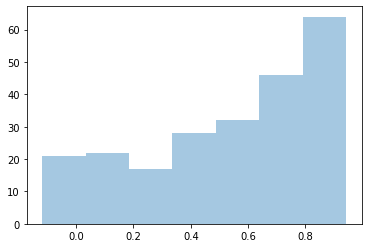

In [1668]:
seaborn.distplot(ccs[np.isfinite(ccs)],kde=0)

In [1683]:
all_resp_arr = []
SPEED_THRESH = 1
all_grid_scores = []

ixs = np.where(np.logical_and(np.all(np.isfinite(position),axis=1),
                              speed>SPEED_THRESH))[0]
occupancy_map,_,_ = np.histogram2d(position[ixs,0],position[ixs,1],bins=np.linspace(0,780,num=51))
occupancy_map = filter_nan_gaussian_david(occupancy_map,3)
for unit_nr in single_units:
    spk_unit = spkT[np.where(spkC==unit_nr)[0]]


    aligned_T = aligner.A_to_B(spk_unit)
    #get the spikes that are in bounds for position encoding
    spks_unit_in_bounds = np.where(np.logical_not(np.isnan(aligned_T)))[0]
    used_spikes = aligned_T[spks_unit_in_bounds].astype('int')
    used_spikes = np.array([i for i in used_spikes if speed[i]>SPEED_THRESH])
    if len(used_spikes)>0:
        posS = position[used_spikes]
        tot_spikes = len(used_spikes)
        spike_poss,_,_ = np.histogram2d(posS[:,0],posS[:,1],bins=np.linspace(0,780,num=51))

        norm_firing = spike_poss/occupancy_map
        norm_smth = filter_nan_gaussian_david(norm_firing,2)
        norm_smth[np.logical_not(np.isfinite(norm_smth))] = 0
        all_grid_scores.append(get_grid_score(norm_smth))
        all_resp_arr.append([unit_nr,norm_smth,tot_spikes,np.max(norm_smth)*30])
    else:
        all_resp_arr.append([unit_nr,np.zeros([50,50]),0,0])

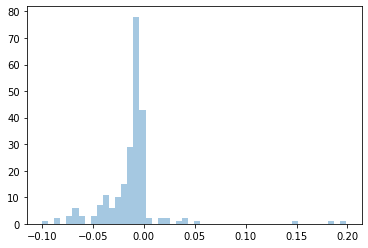

In [1684]:
seaborn.distplot(all_grid_scores,kde=0)

In [1685]:
np.argmax(all_grid_scores)

87

In [ ]:
plt.figure(figsize=(16,16))
kk = 1

n64 = 1
for ix in range(n64*64,(n64+1)*64):
    try:
        unit_nr,resp_map,tot,mx = all_resp_arr[ix]
        plt.subplot(8,8,kk)
        plt.title('ix:{} | u:{} | \nspk:{} mx:{}'.format(ix,unit_nr,tot,np.round(mx,decimals=1)))
        #resp_map = 
        #resp_map[np.isnan(resp_map)] = 0
        plt.imshow(resp_map,cmap='jet')#,vmin=.0,vmax=.2)
        #plt.xlim(50,1050)
        #plt.ylim(50,1050)
        plt.xticks([])
        plt.yticks([])

        kk += 1
    except ValueError:
        break
plt.tight_layout()

In [ ]:
get_rot_mtx = lambda x: np.array([[np.cos(x), -np.sin(x)],[np.sin(x),np.cos(x)]])

In [ ]:
r60 = get_rot_mtx(np.deg2rad(60))

In [ ]:
spk_unit = spkT[np.where(spkC==single_units[185])[0]]


aligned_T = aligner.A_to_B(spk_unit)
#get the spikes that are in bounds for position encoding
spks_unit_in_bounds = np.where(np.logical_not(np.isnan(aligned_T)))[0]
used_spikes = aligned_T[spks_unit_in_bounds].astype('int')
used_spikes = np.array([i for i in used_spikes if speed[i]>SPEED_THRESH])
if len(used_spikes)>0:
    posS = position[used_spikes]
    tot_spikes = len(used_spikes)
    spike_poss,_,_ = np.histogram2d(posS[:,0],posS[:,1],bins=np.linspace(0,780,num=51))

    norm_firing = (spike_poss/occupancy_map)[1:-4,1:-4]
    norm_smth = filter_nan_gaussian_david(norm_firing,3)
    norm_smth[np.logical_not(np.isfinite(norm_smth))] = 0
    all_resp_arr.append([norm_smth,tot_spikes*30/len(position),np.max(norm_smth)*30])
else:
    all_resp_arr.append([np.zeros([50,50]),0])

In [ ]:
sampled_pos = []
sampled_activity = []
for _ in range(2000):
    x,y = np.random.randint(0,50,2)
    activity = np.random.binomial(p=4*norm_smth[x,y],n=1)
    sampled_pos.append([x,y])
    sampled_activity.append(activity)


In [ ]:
sampled_pos = np.array(sampled_pos)
sampled_activity = np.array(sampled_activity)

In [1433]:
posS = sampled_pos[np.where(sampled_activity)[0]]
f,_,_ = np.histogram2d(posS[:,0],posS[:,1],np.arange(50))
f2,_,_ = np.histogram2d(sampled_pos[:,0],sampled_pos[:,1],np.arange(50))

/Users/yves/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


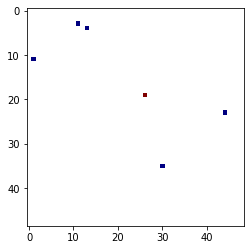

In [1434]:
plt.imshow(filter_nan_gaussian_david(f/f2,5),cmap='jet')

In [1435]:
sampled_pos.shape

(6, 2)

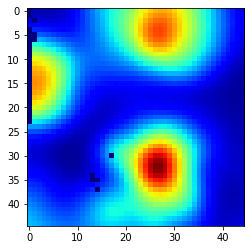

In [1436]:
plt.imshow(norm_smth,cmap='jet')

In [1437]:
def get_grid_score(norm_smth):
    acorr = sp.signal.correlate2d(norm_smth,norm_smth)
    #plt.imshow(acorr,cmap='jet',interpolation=None)
    out = rotated_acorrs(acorr,[60,120])
    cc1 = np.mean([np.corrcoef(acorr.flatten(),i.flatten())[0,1] for i in out])
    #np.mean(cc1)
    
    out = rotated_acorrs(acorr,[30,90,150])
    cc2 = np.mean([np.corrcoef(acorr.flatten(),i.flatten())[0,1] for i in out])
    #np.mean(cc2)
    return cc1 - cc2

In [1455]:
from scipy import interpolate
import numpy as np

def interpolate_missing_pixels(
        image: np.ndarray,
        mask: np.ndarray,
        method: str = 'nearest',
        fill_value: int = 0
):
    """
    :param image: a 2D image
    :param mask: a 2D boolean image, True indicates missing values
    :param method: interpolation method, one of
        'nearest', 'linear', 'cubic'.
    :param fill_value: which value to use for filling up data outside the
        convex hull of known pixel values.
        Default is 0, Has no effect for 'nearest'.
    :return: the image with missing values interpolated
    """
    from scipy import interpolate

    h, w = image.shape[:2]
    xx, yy = np.meshgrid(np.arange(w), np.arange(h))

    known_x = xx[~mask]
    known_y = yy[~mask]
    known_v = image[~mask]
    missing_x = xx[mask]
    missing_y = yy[mask]

    interp_values = interpolate.griddata(
        (known_x, known_y), known_v, (missing_x, missing_y),
        method=method, fill_value=fill_value
    )

    interp_image = image.copy()
    interp_image[missing_y, missing_x] = interp_values

    return interp_image

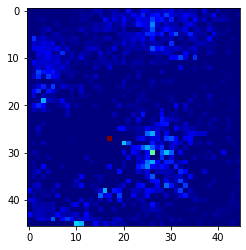

In [1460]:
plt.imshow(interpolate_missing_pixels(norm_smth,mask=np.isnan(norm_smth)),cmap='jet')

In [1480]:
x

(0, 1)

/Users/yves/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
/Users/yves/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.


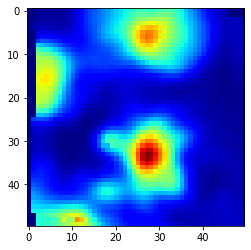

In [1546]:
norm_firing = (spike_poss/occupancy_map)
norm_smth = filter_nan_gaussian_david(norm_firing,2)
for x,y in zip(*np.where(np.isnan(norm_smth))):
    norm_smth[x,y] = np.nanmean(norm_smth[x-2:x+2,y-2:y+2])
#norm_smth = norm_smth[:,1:]
    #nans, x= nan_helper(norm_smth)

#norm_smth[nans]= np.interp(x(nans), x(~nans), norm_smth[~nans])
#norm_smth[np.logical_not(np.isfinite(norm_smth))] = 0
norm_smth[np.logical_not(np.isfinite(norm_smth))] = 0
plt.imshow(norm_smth,cmap='jet')


In [1547]:
norm_smth.shape

(50, 50)

In [1571]:
>>> radius = 48
>>> a = np.zeros((100-1, 100-1)).astype('uint8')
>>> cx, cy = 50,50 # The center of circle
>>> y, x = np.ogrid[-radius: radius, -radius: radius]
>>> index = x**2 + y**2 <= radius**2
>>> a[cy-radius:cy+radius, cx-radius:cx+radius][index] = 1


radius = 18
>>> cx, cy = 50,50 # The center of circle
>>> y, x = np.ogrid[-radius: radius, -radius: radius]
>>> index = x**2 + y**2 <= radius**2
>>> a[cy-radius:cy+radius, cx-radius:cx+radius][index] = 0


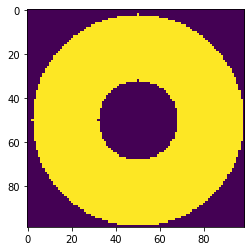

In [1572]:
plt.imshow(a)

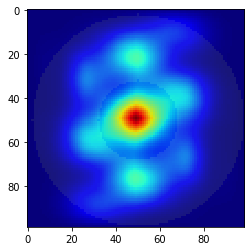

In [1573]:
acorr = sp.signal.correlate2d(norm_smth,norm_smth,)
plt.imshow(acorr,cmap='jet',interpolation=None)
plt.imshow(a,alpha=.1)


In [1574]:
def rotated_acorrs(acorr,angles):
    return [
        ndi.interpolation.rotate(acorr, angle, reshape=False)
        for angle in angles
    ]


In [1575]:
acorr.shape

(99, 99)

In [1576]:
a.shape

(99, 99)

In [1577]:
acorr = np.ma.masked_array(acorr,a)

In [1578]:
out = rotated_acorrs(acorr,[60,120])
cc1 = [np.corrcoef(acorr[a].flatten(),i[a].flatten())[0,1] for i in out]
np.mean(cc1)

0.23480254067737671

In [1579]:
out = rotated_acorrs(acorr,[30,90,150])
cc1 = [np.corrcoef(acorr[a].flatten(),i[a].flatten())[0,1] for i in out]
np.mean(cc1)

0.2152121233887269

In [1580]:
aligner.A_to_B(np.array([65124.,65124.]))

array([615.83371465, 615.83371465])

In [1275]:
all_resp_arr = []
n_ = 9
out_ctr = 0
ctr = 0
for unit in single_units:#[n_:n_+1]:
    ctr += 1
    spk_unit = spkT[np.where(spkC==unit)[0]]
    
    
    aligned_T = aligner.A_to_B(spk_unit)
    #get the spikes that are in bounds for position encoding
    spks_unit_in_bounds = np.where(np.logical_not(np.isnan(aligned_T)))[0]
    used_spikes = aligned_T[spks_unit_in_bounds].astype('int')
    resp_arr = np.zeros([1000,1000])
    
    for i in used_spikes:#[int(len(used_spikes)/2):]:
        try:
            tmp_ = np.zeros([1000,1000])
            at_pos = position[i]
            if speed[i]>2:
                xp,yp = at_pos.astype(int)
                #tmp_ = np.zeros([1000,1000])
                resp_arr[2*dd_+xp-dd_:2*dd_+xp+dd_,2*dd_+yp-dd_:2*dd_+yp+dd_] += g
                #tmp_ = gaussian_filter(tmp_,[10,10])
                #resp_arr += tmp_
            #mu = at_pos
            #d = ((np.dstack([x,y]) - mu[None,None,:])**2).sum(axis=2)
            #g = np.exp(-( (d)**2 / ( 2.0 * sigma**2 ) ) )
            #resp_arr += g
            #resp_arr[xp-1dd_:xp+1dd_,yp-1dd_:yp+1dd_] += g
        except Exception as e:
            if e==KeyboardInterrupt:
                break
            else:
                out_ctr += 1
                pass
    print('ctr:{}  | unit:{}  |  n_spikes:{}  | FR:{:.2f} | n_out_of_bounds:{}  | mu_T:{:.2f}'
          .format(ctr,unit,len(spks_unit_in_bounds),30*len(spks_unit_in_bounds)/(len(position)),out_ctr,np.mean(spk_unit)/30000.))
    all_resp_arr.append(resp_arr.copy())

ctr:1  | unit:4  |  n_spikes:12948  | FR:3.10 | n_out_of_bounds:886  | mu_T:2076.24
ctr:2  | unit:7  |  n_spikes:40660  | FR:9.74 | n_out_of_bounds:4003  | mu_T:2104.48
ctr:3  | unit:10  |  n_spikes:412  | FR:0.10 | n_out_of_bounds:4005  | mu_T:2587.77
ctr:4  | unit:12  |  n_spikes:1325  | FR:0.32 | n_out_of_bounds:4031  | mu_T:2127.39
ctr:5  | unit:13  |  n_spikes:19467  | FR:4.67 | n_out_of_bounds:5484  | mu_T:2411.13
ctr:6  | unit:18  |  n_spikes:19011  | FR:4.56 | n_out_of_bounds:6609  | mu_T:2062.84
ctr:7  | unit:20  |  n_spikes:135038  | FR:32.36 | n_out_of_bounds:18832  | mu_T:2083.21
ctr:8  | unit:21  |  n_spikes:1627  | FR:0.39 | n_out_of_bounds:18889  | mu_T:2108.48
ctr:9  | unit:27  |  n_spikes:609  | FR:0.15 | n_out_of_bounds:18924  | mu_T:2026.44
ctr:10  | unit:29  |  n_spikes:37  | FR:0.01 | n_out_of_bounds:18927  | mu_T:2258.67
ctr:11  | unit:31  |  n_spikes:5504  | FR:1.32 | n_out_of_bounds:19330  | mu_T:2146.61


KeyboardInterrupt: 

In [346]:
def get_occupancy_map(position,speed,sigma=25,dd_=100,tot_pix_size=[1000,1000],speed_thresh=2):
    occupancy_arr = np.zeros([1000,1000])
    g = gaussian_kernel(2*dd_,sigma)
    len_pos = len(position)
    for ctr,i in enumerate(position):
        if speed[ctr]>speed_thresh:
            if np.remainder(ctr,10)==0:
                sys.stdout.write('\rframe:{:.2f}/{:.2f}'.format(ctr,len_pos))
                sys.stdout.flush()
            try:
                xp, yp = i.astype(int)
                #tmp_ = np.zeros([1000,1000])
                #tmp_[xp,yp] += g
                #tmp_ = gaussian_filter(tmp_,[10,10])}
                occupancy_arr[2*dd_+xp-dd_:2*dd_+xp+dd_,2*dd_+yp-dd_:2*dd_+yp+dd_] += g
            #occupancy_arr += g
            except:
                pass   
    return occupancy_arr

In [347]:
half = int(position.shape[0]/2)
occ_map_first_half = get_occupancy_map(position[:half],speed[:half])
occ_map_second_half = get_occupancy_map(position[half:],speed[half:])

frame:34050.00/34667.00

In [316]:
occupancy_arr = np.zeros([1000,1000])

len_pos = len(position)
for ctr,i in enumerate(position):
    if speed[ctr]>2:
        if np.remainder(ctr,10)==0:
            sys.stdout.write('\rframe:{:.2f}/{:.2f}'.format(ctr,len_pos))
            sys.stdout.flush()
        try:
            xp, yp = i.astype(int)
            #tmp_ = np.zeros([1000,1000])
            #tmp_[xp,yp] += g
            #tmp_ = gaussian_filter(tmp_,[10,10])}
            occupancy_arr[2*dd_+xp-dd_:2*dd_+xp+dd_,2*dd_+yp-dd_:2*dd_+yp+dd_] += g
        #occupancy_arr += g
        except:
            pass

frame:68720.00/69333.00

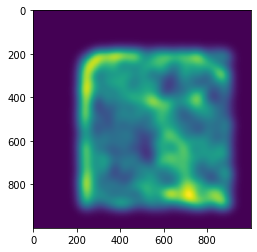

In [317]:
plt.imshow(occupancy_arr)

/Users/yves/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


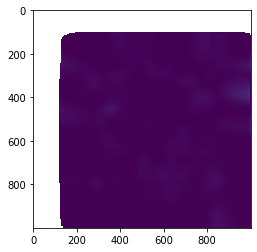

In [318]:
plt.imshow(resp_arr/occupancy_arr)

In [319]:
from numpy.fft import fft, ifft, fftshift

def xcorr(x):
    l = 2 ** int(np.log2(x.shape[1] * 2 - 1))
    fftx = fft(x, n = l, axis = 1)
    ret = ifft(fftx * np.conjugate(fftx), axis = 1)
    ret = fftshift(ret, axes=1)
    return ret

In [320]:
import numpy
from numpy.fft import fft, ifft

data = (arr/occupancy_arr)[100:600,100:600]
#rint data
##[[ 0  1  2  3]
## [ 4  5  6  7]
## [ 8  9 10 11]
## [12 13 14 15]
## [16 17 18 19]]
dataFT = fft(data, axis=1)
dataAC = ifft(dataFT * numpy.conjugate(dataFT), axis=1).real


/Users/yves/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


In [321]:
#out = xcorr((arr/occupancy_arr)[100:600,100:600])

In [322]:
143

143

In [323]:
len(all_resp_arr)

286

/Users/yves/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


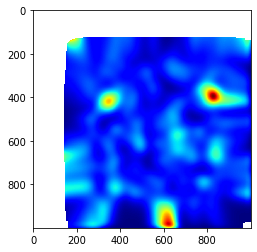

In [337]:
arr =all_resp_arr[17]
resp_map = gaussian_filter(arr/occupancy_arr,12,mode='constant',truncate=2)
plt.imshow(resp_map,cmap='jet')

In [338]:
from scipy.ndimage import convolve
resp_map_downsampled = convolve(resp_map, 
                 np.array([[0.25,0.25]*4,[0.25,0.25]*4]))[:resp_map.shape[0]:8,:resp_map.shape[1]:8]


In [339]:
import scipy.signal

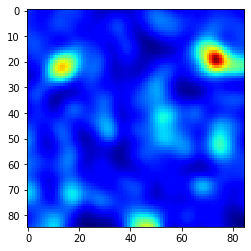

In [340]:
plt.imshow(resp_map_downsampled[30:-10,30:-10],cmap='jet')

In [343]:
out  = scipy.signal.correlate2d(resp_map_downsampled[30:-10,30:-10],resp_map_downsampled[30:-10,30:-10]

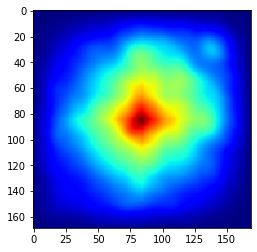

In [344]:
plt.imshow(out,cmap='jet')

In [330]:
scipy.cross

<function numpy.cross(a, b, axisa=-1, axisb=-1, axisc=-1, axis=None)>

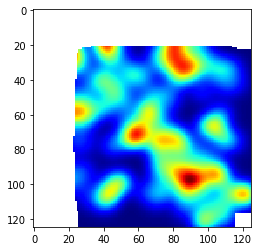

In [331]:
plt.imshow(resp_map_downsampled,cmap='jet')

/Users/yves/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/Users/yves/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


IndexError: list index out of range

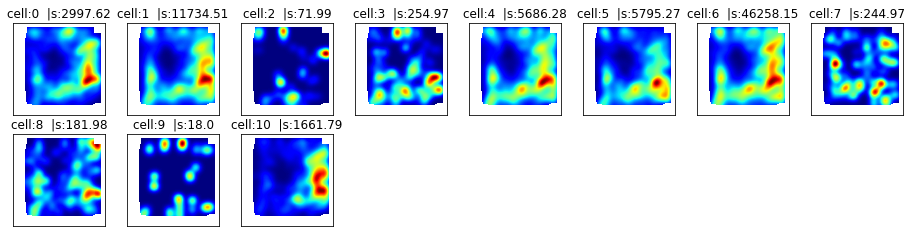

In [1277]:
plt.figure(figsize=(16,16))
kk = 1

n64 = 0
for ix in range(n64*64,(n64+1)*64):
    arr = all_resp_arr[ix]
    plt.subplot(8,8,kk)
    plt.title('cell:{}  |s:{}'.format(ix,np.round(np.sum(arr),decimals=2)))
    resp_map = gaussian_filter(arr/occupancy_arr,30,mode='constant',truncate=2)
    #resp_map[np.isnan(resp_map)] = 0
    plt.imshow(resp_map,cmap='jet')#,vmin=.0,vmax=.2)
    plt.xlim(50,1050)
    plt.ylim(50,1050)
    plt.xticks([])
    plt.yticks([])

    kk += 1

In [248]:
M = gaussian_filter((all_resp_arr[12]/occupancy_arr),22,mode='constant',truncate=2)
M = M[165:-50,165:-50]
#M = np.pad(M,200)
out = get_autocorrelation(M)
plt.subplot(1,2,1)
plt.imshow(M,cmap='jet')
plt.subplot(1,2,2)
plt.imshow(out,cmap='jet')

/Users/yves/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


NameError: name 'get_autocorrelation' is not defined

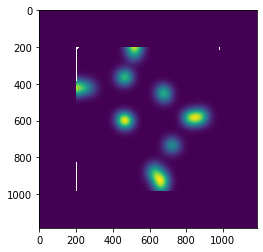

In [249]:
plt.imshow(np.pad(M,200))

# Check half split

In [348]:
def get_rate_map(aligned_spike_times,speed,position,dd_=100,sigma=25,start=None,end=None,speed_thresh=2):
    resp_arr = np.zeros([1000,1000])
    g = gaussian_kernel(2*dd_,sigma)
    print(g.shape)
    err_ctr = 0

    if start is not None:
        aligned_spike_times = aligned_spike_times[aligned_spike_times>start]
    if end is not None:
        aligned_spike_times = aligned_spike_times[aligned_spike_times<end]

    for spk in aligned_spike_times[20:]:
        try:
            tmp_ = np.zeros([1000,1000])
            at_pos = position[spk]
            
            xp,yp = at_pos.astype(int)
            #tmp_ = np.zeros([1000,1000])
            #print(resp_arr[2*dd_+xp-dd_:2*dd_+xp+dd_,2*dd_+yp-dd_:2*dd_+yp+dd_].shape,g.shape,at_pos)
            if speed[spk]>speed_thresh:
                resp_arr[2*dd_+xp-dd_:2*dd_+xp+dd_,2*dd_+yp-dd_:2*dd_+yp+dd_] += g
        except ValueError:
            pass
            err_ctr += 1
    print(err_ctr,len(aligned_spike_times))
    return resp_arr

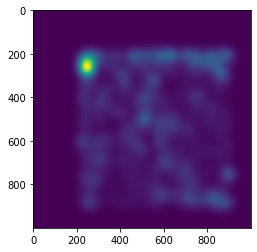

In [294]:
plt.imshow(occ_map_second_half)

In [295]:
used_spikes[used_spikes<half_time].shape

(522,)

In [349]:
half_time = int(position.shape[0]/2)
occ_map_first_half = get_occupancy_map(position[:half_time],speed[:half_time])
occ_map_second_half = get_occupancy_map(position[half_time:],speed[half_time:])

frame:34050.00/34667.00

In [356]:
unit = single_units[78]
spk_unit = spkT[np.where(spkC==unit)[0]]


aligned_T = aligner.A_to_B(spk_unit)
#get the spikes that are in bounds for position encoding
spks_unit_in_bounds = np.where(np.logical_not(np.isnan(aligned_T)))[0]
used_spikes = aligned_T[spks_unit_in_bounds].astype('int')


a1 = get_rate_map(used_spikes,speed,position,end=half_time)
a2 = get_rate_map(used_spikes,speed,position,start=half_time)

(200, 200)
51 546
(200, 200)
29 395


/Users/yves/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/Users/yves/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


([], <a list of 0 Text yticklabel objects>)

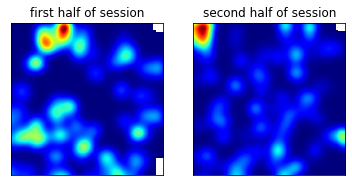

In [357]:
#a2 = all_resp_arr[16]
plt.subplot(1,2,1)
plt.title('first half of session')
M = gaussian_filter(a2/occ_map_second_half,20,mode='constant',truncate=2)
plt.imshow(M,cmap='jet')
plt.xlim(200,1000)
plt.ylim(200,1000)
plt.xticks([])
plt.yticks([])
plt.subplot(1,2,2)
plt.title('second half of session')
M = gaussian_filter(a1/occ_map_first_half,20,mode='constant',truncate=2)
plt.imshow(M,cmap='jet')
plt.xlim(200,1000)
plt.ylim(200,1000)
plt.xticks([])
plt.yticks([])

In [191]:
t1_ = gaussian_filter((a2/occ_map_second_half).flatten(),32)
t2_ = gaussian_filter((a1/occ_map_first_half).flatten(),32)
ixs = np.logical_and(np.isfinite(t1_),np.isfinite(t2_))
np.corrcoef(t1_[ixs],t2_[ixs])[0,1]

/Users/yves/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
/Users/yves/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


0.24491664389439327

/Users/yves/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


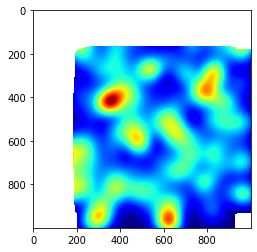

In [354]:
M = gaussian_filter(a1/occ_map_first_half,32,mode='constant',truncate=2)
plt.imshow(M,cmap='jet')

In [1504]:
# Copyright 2018 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================

"""Grid score calculations.
"""

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import math
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal


def circle_mask(size, radius, in_val=1.0, out_val=0.0):
  """Calculating the grid scores with different radius."""
  sz = [math.floor(size[0] / 2), math.floor(size[1] / 2)]
  x = np.linspace(-sz[0], sz[1], size[1])
  x = np.expand_dims(x, 0)
  x = x.repeat(size[0], 0)
  y = np.linspace(-sz[0], sz[1], size[1])
  y = np.expand_dims(y, 1)
  y = y.repeat(size[1], 1)
  z = np.sqrt(x**2 + y**2)
  z = np.less_equal(z, radius)
  vfunc = np.vectorize(lambda b: b and in_val or out_val)
  return vfunc(z)


class GridScorer(object):
  """Class for scoring ratemaps given trajectories."""

  def __init__(self, nbins, coords_range, mask_parameters, min_max=False):
    """Scoring ratemaps given trajectories.
    Args:
      nbins: Number of bins per dimension in the ratemap.
      coords_range: Environment coordinates range.
      mask_parameters: parameters for the masks that analyze the angular
        autocorrelation of the 2D autocorrelation.
      min_max: Correction.
    """
    self._nbins = nbins
    self._min_max = min_max
    self._coords_range = coords_range
    self._corr_angles = [30, 45, 60, 90, 120, 135, 150]
    # Create all masks
    self._masks = [(self._get_ring_mask(mask_min, mask_max), (mask_min,
                                                              mask_max))
                   for mask_min, mask_max in mask_parameters]
    # Mask for hiding the parts of the SAC that are never used
    self._plotting_sac_mask = circle_mask(
        [self._nbins * 2 - 1, self._nbins * 2 - 1],
        self._nbins,
        in_val=1.0,
        out_val=np.nan)

  def calculate_ratemap(self, xs, ys, activations, statistic='mean'):
    return scipy.stats.binned_statistic_2d(
        xs,
        ys,
        activations,
        bins=self._nbins,
        statistic=statistic,
        range=self._coords_range)[0]

  def _get_ring_mask(self, mask_min, mask_max):
    n_points = [self._nbins * 2 - 1, self._nbins * 2 - 1]
    return (circle_mask(n_points, mask_max * self._nbins) *
            (1 - circle_mask(n_points, mask_min * self._nbins)))

  def grid_score_60(self, corr):
    if self._min_max:
      return np.minimum(corr[60], corr[120]) - np.maximum(
          corr[30], np.maximum(corr[90], corr[150]))
    else:
      return (corr[60] + corr[120]) / 2 - (corr[30] + corr[90] + corr[150]) / 3

  def grid_score_90(self, corr):
    return corr[90] - (corr[45] + corr[135]) / 2

  def calculate_sac(self, seq1):
    """Calculating spatial autocorrelogram."""
    seq2 = seq1

    def filter2(b, x):
      stencil = np.rot90(b, 2)
      return scipy.signal.convolve2d(x, stencil, mode='full')

    seq1 = np.nan_to_num(seq1)
    seq2 = np.nan_to_num(seq2)

    ones_seq1 = np.ones(seq1.shape)
    ones_seq1[np.isnan(seq1)] = 0
    ones_seq2 = np.ones(seq2.shape)
    ones_seq2[np.isnan(seq2)] = 0

    seq1[np.isnan(seq1)] = 0
    seq2[np.isnan(seq2)] = 0

    seq1_sq = np.square(seq1)
    seq2_sq = np.square(seq2)

    seq1_x_seq2 = filter2(seq1, seq2)
    sum_seq1 = filter2(seq1, ones_seq2)
    sum_seq2 = filter2(ones_seq1, seq2)
    sum_seq1_sq = filter2(seq1_sq, ones_seq2)
    sum_seq2_sq = filter2(ones_seq1, seq2_sq)
    n_bins = filter2(ones_seq1, ones_seq2)
    n_bins_sq = np.square(n_bins)

    std_seq1 = np.power(
        np.subtract(
            np.divide(sum_seq1_sq, n_bins),
            (np.divide(np.square(sum_seq1), n_bins_sq))), 0.5)
    std_seq2 = np.power(
        np.subtract(
            np.divide(sum_seq2_sq, n_bins),
            (np.divide(np.square(sum_seq2), n_bins_sq))), 0.5)
    covar = np.subtract(
        np.divide(seq1_x_seq2, n_bins),
        np.divide(np.multiply(sum_seq1, sum_seq2), n_bins_sq))
    x_coef = np.divide(covar, np.multiply(std_seq1, std_seq2))
    x_coef = np.real(x_coef)
    x_coef = np.nan_to_num(x_coef)
    return x_coef

  def rotated_sacs(self, sac, angles):
    return [
        scipy.ndimage.interpolation.rotate(sac, angle, reshape=False)
        for angle in angles
    ]

  def get_grid_scores_for_mask(self, sac, rotated_sacs, mask):
    """Calculate Pearson correlations of area inside mask at corr_angles."""
    masked_sac = sac * mask
    ring_area = np.sum(mask)
    # Calculate dc on the ring area
    masked_sac_mean = np.sum(masked_sac) / ring_area
    # Center the sac values inside the ring
    masked_sac_centered = (masked_sac - masked_sac_mean) * mask
    variance = np.sum(masked_sac_centered**2) / ring_area + 1e-5
    corrs = dict()
    for angle, rotated_sac in zip(self._corr_angles, rotated_sacs):
      masked_rotated_sac = (rotated_sac - masked_sac_mean) * mask
      cross_prod = np.sum(masked_sac_centered * masked_rotated_sac) / ring_area
      corrs[angle] = cross_prod / variance
    return self.grid_score_60(corrs), self.grid_score_90(corrs), variance

  def get_scores(self, rate_map):
    """Get summary of scrores for grid cells."""
    sac = self.calculate_sac(rate_map)
    rotated_sacs = self.rotated_sacs(sac, self._corr_angles)

    scores = [
        self.get_grid_scores_for_mask(sac, rotated_sacs, mask)
        for mask, mask_params in self._masks  # pylint: disable=unused-variable
    ]
    scores_60, scores_90, variances = map(np.asarray, zip(*scores))  # pylint: disable=unused-variable
    max_60_ind = np.argmax(scores_60)
    max_90_ind = np.argmax(scores_90)

    return (scores_60[max_60_ind], scores_90[max_90_ind],
            self._masks[max_60_ind][1], self._masks[max_90_ind][1], sac)

  def plot_ratemap(self, ratemap, ax=None, title=None, *args, **kwargs):  # pylint: disable=keyword-arg-before-vararg
    """Plot ratemaps."""
    if ax is None:
      ax = plt.gca()
    # Plot the ratemap
    ax.imshow(ratemap, interpolation='none', *args, **kwargs)
    # ax.pcolormesh(ratemap, *args, **kwargs)
    ax.axis('off')
    if title is not None:
      ax.set_title(title)

  def plot_sac(self,
               sac,
               mask_params=None,
               ax=None,
               title=None,
               *args,
               **kwargs):  # pylint: disable=keyword-arg-before-vararg
    """Plot spatial autocorrelogram."""
    if ax is None:
      ax = plt.gca()
    # Plot the sac
    useful_sac = sac * self._plotting_sac_mask
    ax.imshow(useful_sac, interpolation='none', *args, **kwargs)
    # ax.pcolormesh(useful_sac, *args, **kwargs)
    # Plot a ring for the adequate mask
    if mask_params is not None:
      center = self._nbins - 1
      ax.add_artist(
          plt.Circle(
              (center, center),
              mask_params[0] * self._nbins,
              # lw=bump_size,
              fill=False,
              edgecolor='k'))
      ax.add_artist(
          plt.Circle(
              (center, center),
              mask_params[1] * self._nbins,
              # lw=bump_size,
              fill=False,
              edgecolor='k'))
    ax.axis('off')
    if title is not None:
      ax.set_title(title)

In [1521]:
def get_ring_mask(mask_min, mask_max):
    n_bins=50
    n_points = [n_bins * 2 - 1, n_bins * 2 - 1]
    return (circle_mask(n_points, mask_max * n_bins) *
            (1 - circle_mask(n_points, mask_min * n_bins)))


In [1522]:
np.sum(get_ring_mask(10,20))

0.0